# Reliability Analysis in Python

A python version of <a href="https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/">Reliability Analysis in R </a>.

## Packages

To run this notebook, you will need the following python packages installed: `numpy`, `matplotlib`, `pandas`, `reliability`, `weibull` and `statsmodels`. Note that the weibull package is being superceded by reliability.

### Pandas

pandas is a library desgined to make working with structed and time series data easy and intuitive, and is available from [here](https://pypi.org/project/pandas/). 

### Reliability

reliability is a library for reliability engineering and survival analysis and it's key features include fitting probability distributions to right censored data and fitting Weibull models. It's available from [here](https://pypi.org/project/reliability/).

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import reliability as rb
import weibull as wb
from statsmodels.distributions.empirical_distribution import ECDF

# Analysis

## 1. Dataset

In [2]:
exa1 = pd.read_csv('https://raw.githubusercontent.com/CodeOwl94/ross-reliability/master/EXA1.csv', header=0)
exa1.head()

,fail,time
0,F,57
1,F,7
2,F,21
3,F,7
4,S,76


Our data appears to have been read in OK, we know this as the number of rows, 127, and number of columns, 2, match both the <a href="https://raw.githubusercontent.com/CodeOwl94/ross-reliability/master/EXA1.csv">original data set</a> and the <a href="https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/"> R script</a>. 

In [3]:
exa1['fail'].value_counts()

F    123
S      4
Name: fail, dtype: int64

We can also see that the data has been read OK with the number of F's and S's, where the values of the <code>fail</code> column are:

<ul>F, Failure: a valid time-to-failure measurement, or</ul>
 
<ul>S, Suspension: a right censored measurement</ul>

We'll first sort the data by <code>time</code>, in ascending order to make it easier to plot.

In [4]:
exa1 = exa1.sort_values(by='time',ignore_index=True, ascending=True)
exa1.head()

,fail,time
0,F,3
1,F,3
2,F,3
3,F,3
4,F,3


## 2. Graphical Analysis

Using <i>matplotlib</i> we can have an initial look at the data. Following the <a href='https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/'>R script</a> we'll plot subsets of the data to have a better look.

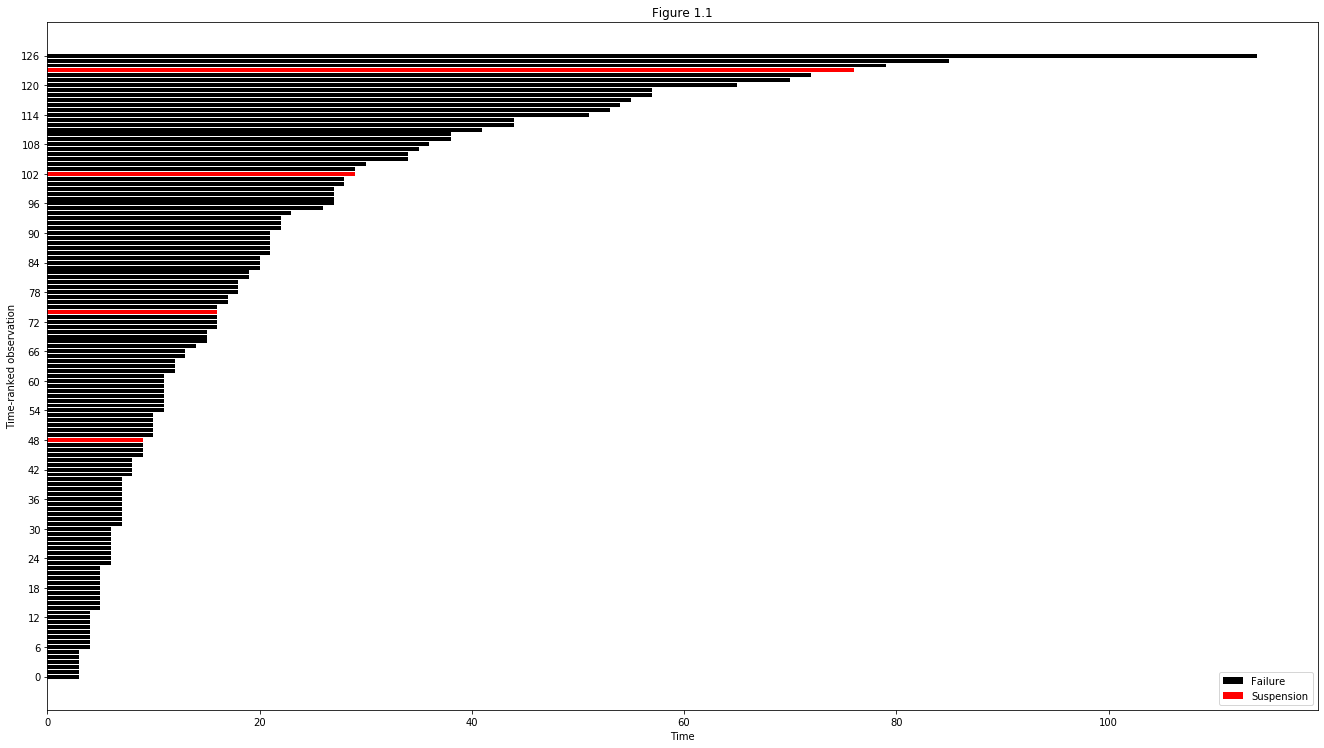

In [5]:
yaxis = np.arange(0, len(exa1), 6)

fig, ax = plt.subplots()

mask1 = exa1['fail']=='F'
mask2 = exa1['fail']=='S'

ax.barh(np.arange(0,len(exa1))[mask1], exa1['time'][mask1], color='black', label='Failure')
ax.barh(np.arange(0,len(exa1))[mask2], exa1['time'][mask2], color='red', label='Suspension')

ax.set_yticks(yaxis)
ax.set_yticklabels(yaxis)
ax.set_xlabel('Time')
ax.set_ylabel('Time-ranked observation')
ax.set_title('Figure 1.1')
ax.legend()
fig.set_size_inches(18.5, 10.5)

plt.show()

Plotting the observations ranked 1 to 60, in terms of time measurement we can see the first right-censored measurement occurs at rank 48, along with three other measurements.

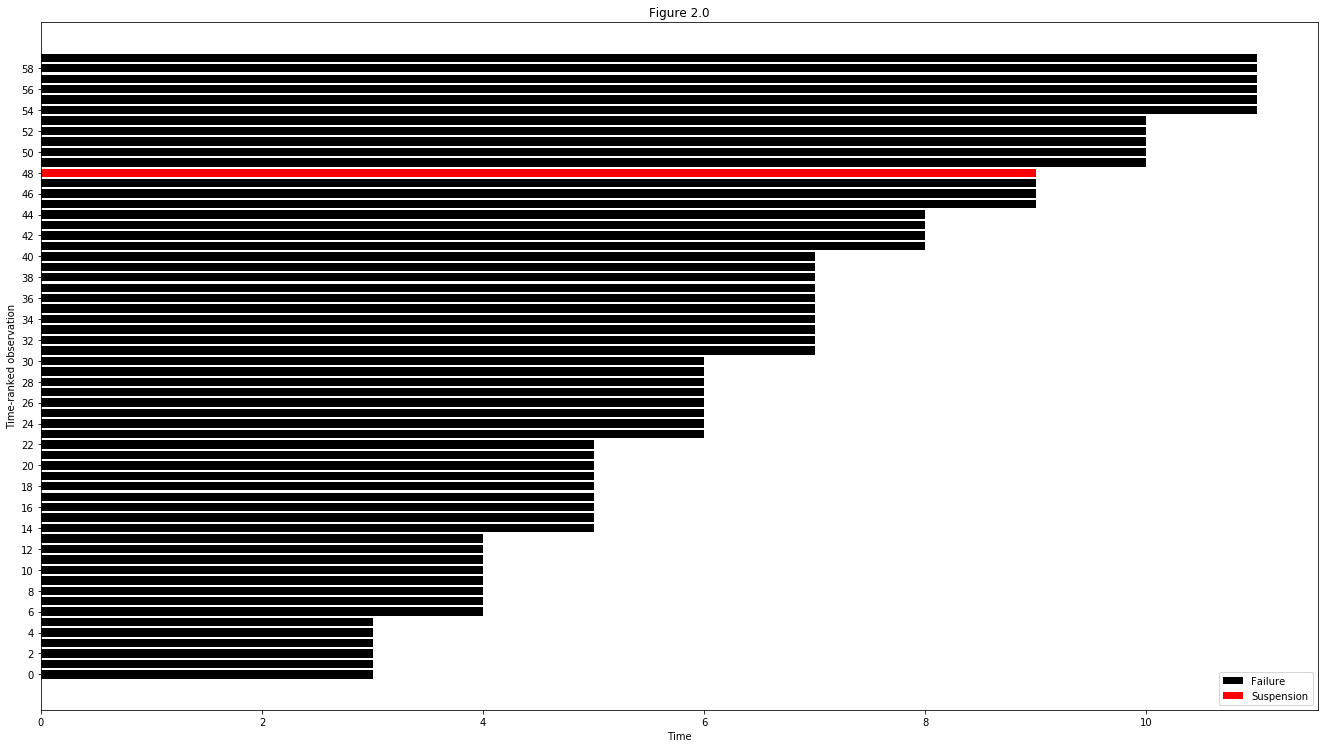

In [6]:
yaxis = np.arange(0, len(exa1[:60]), 2)

fig, ax = plt.subplots()

mask1 = exa1[:60]['fail']=='F'
mask2 = exa1[:60]['fail']=='S'

ax.barh(np.arange(0,len(exa1[:60]))[mask1], exa1[:60]['time'][mask1], color='black', label='Failure')
ax.barh(np.arange(0,len(exa1[:60]))[mask2], exa1[:60]['time'][mask2], color='red', label='Suspension')

ax.set_yticks(yaxis)
ax.set_yticklabels(yaxis)
ax.set_xlabel('Time')
ax.set_ylabel('Time-ranked observation')
ax.set_title('Figure 2.0')
ax.legend()
fig.set_size_inches(18.5, 10.5)

plt.show()

Looking at the remainder of observations, we see that the three other censored measurements occur at ranks 75,  102, and 123.


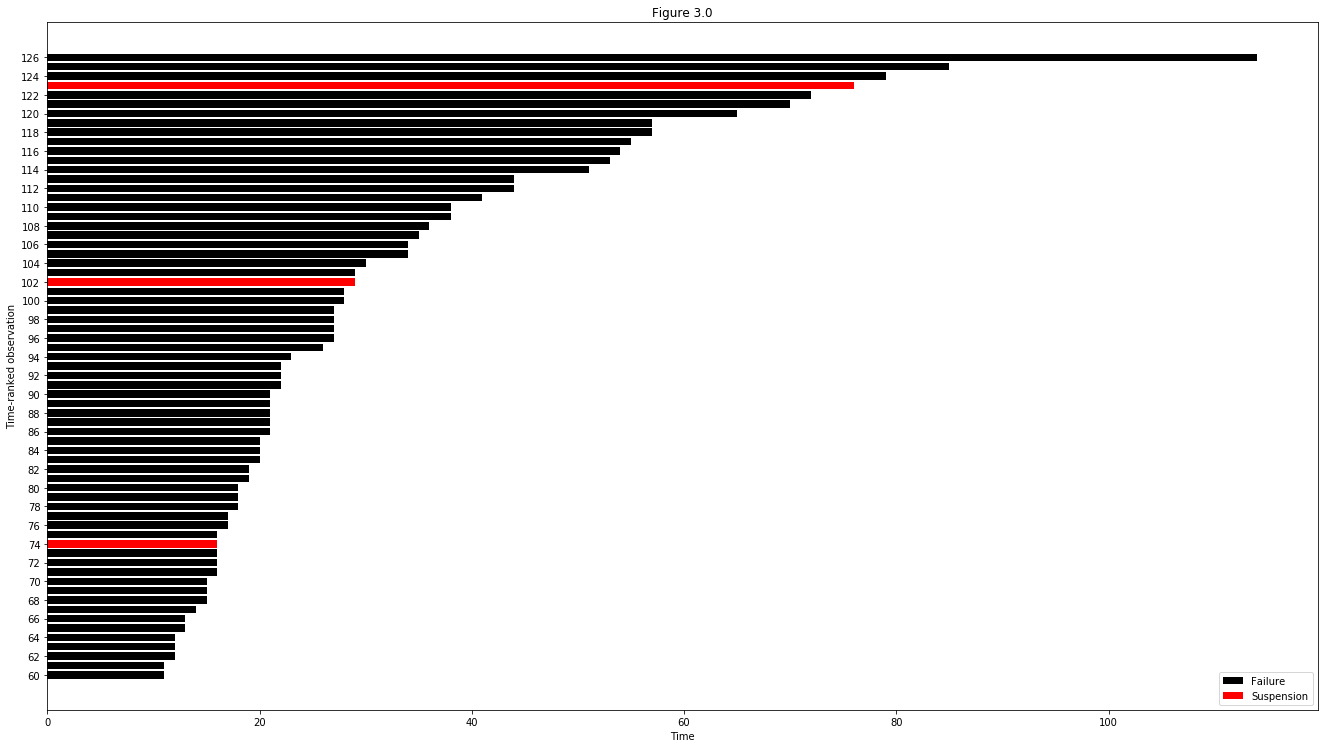

In [7]:
yaxis = np.arange(60 ,len(exa1), 2)

fig, ax = plt.subplots()

mask1 = exa1[60:]['fail']=='F'
mask2 = exa1[60:]['fail']=='S'

ax.barh(np.arange(60,len(exa1))[mask1], exa1[60:]['time'][mask1], color='black', label='Failure')
ax.barh(np.arange(60,len(exa1))[mask2], exa1[60:]['time'][mask2], color='red', label='Suspension')

ax.set_yticks(yaxis)
ax.set_yticklabels(yaxis)
ax.set_xlabel('Time')
ax.set_ylabel('Time-ranked observation')
ax.set_title('Figure 3.0')
ax.legend()
fig.set_size_inches(18.5, 10.5)

plt.show()

And to verify the ranks:

In [8]:
print(exa1[exa1['fail']=='S'])

    fail  time
48     S     9
74     S    16
102    S    29
123    S    76


Now, we'll have a look at the empirical cumulative frequency distribution of the complete time-to-failure measurements.

In [9]:
failures = exa1[exa1['fail']=='F']
right_censored = exa1[exa1['fail']=='S']

In [10]:
ecdf = ECDF(failures['time'])

qtl_25 = failures.quantile(q = 0.25)
qtl_5 = failures.quantile(q = 0.5)
qtl_75 = failures.quantile(q = 0.75)

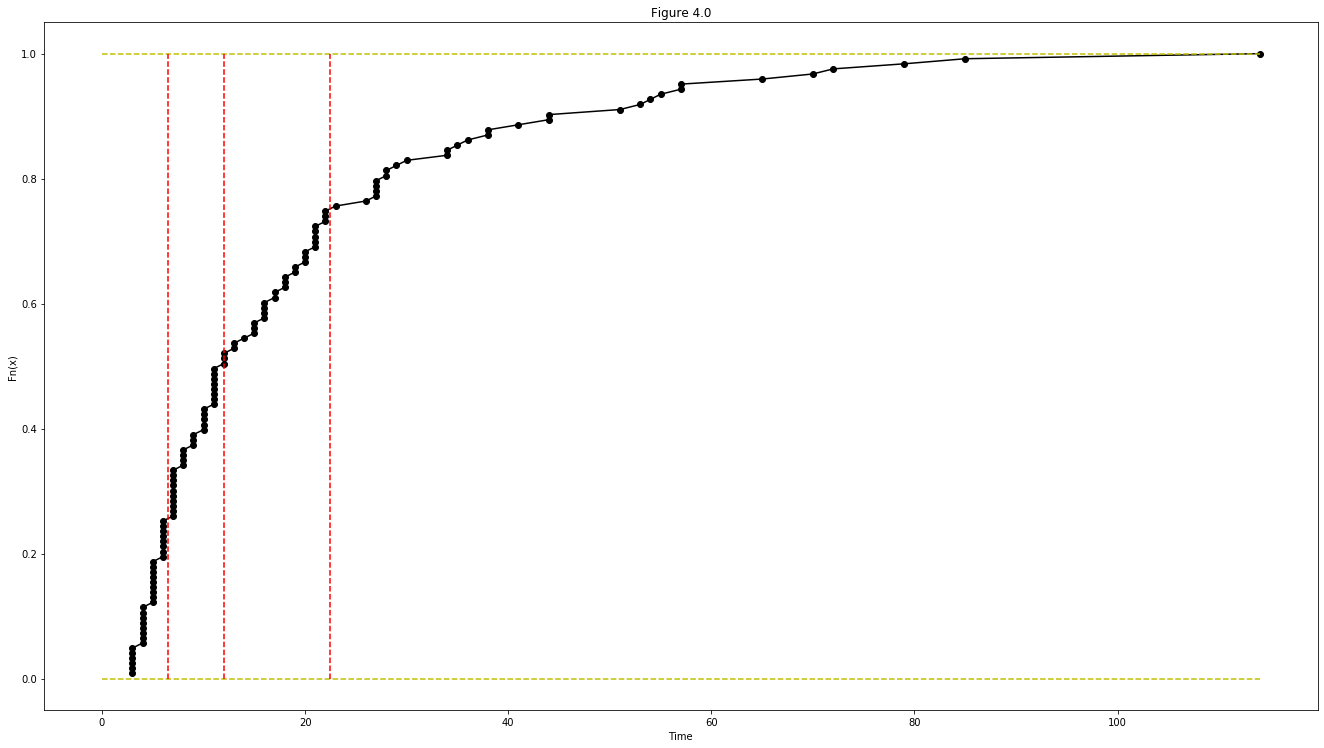

In [11]:
fig, ax = plt.subplots()

plt.plot(ecdf.x, ecdf.y, '-k')
plt.plot(ecdf.x, ecdf.y, 'ok')

### Horizontal Lines at 0 and 1
plt.plot([0, max(failures['time'])], [0,0], '--y')
plt.plot([0, max(failures['time'])], [1,1], '--y')


### Quantile Lines
plt.plot([qtl_25, qtl_25], [0, 1], '--r')
plt.plot([qtl_5, qtl_5], [0, 1], '--r')
plt.plot([qtl_75, qtl_75], [0, 1], '--r')

ax.set_xlabel('Time')
ax.set_ylabel('Fn(x)')
ax.set_title('Figure 4.0')
fig.set_size_inches(18.5, 10.5)

plt.show()

Next, the sampled frequencies as a histogram:

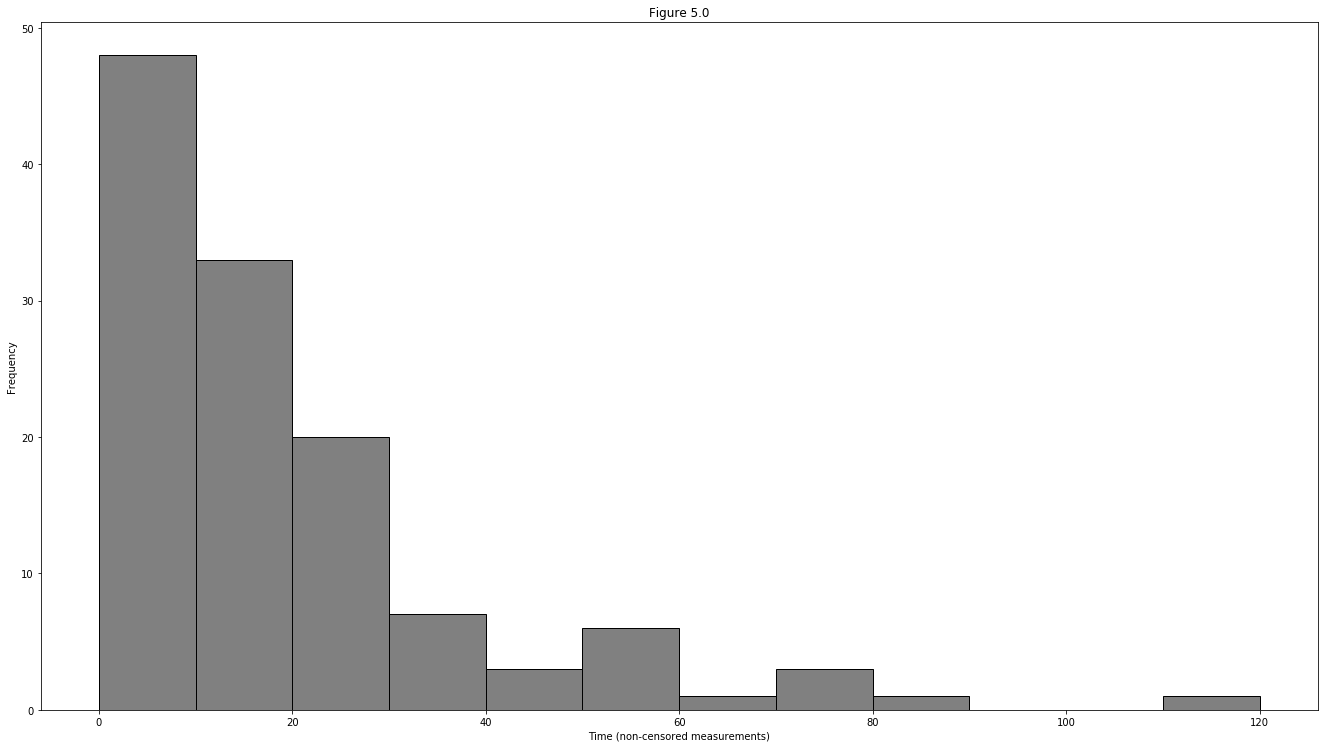

In [12]:
fig, ax = plt.subplots()

bins = np.arange(0, max(failures['time'])+10, 10)
plt.hist(failures['time'], bins=bins, range=(5, max(failures['time'])), color='grey', edgecolor='black')

ax.set_xlabel('Time (non-censored measurements)')
ax.set_ylabel('Frequency')
ax.set_title('Figure 5.0')
fig.set_size_inches(18.5, 10.5)

plt.show()

To return the plotted values, we first create a `bin` column in our data frame, and then we can look at the frequencies. 

In [13]:
bins = np.arange(0, max(failures['time'])+10, 10)

failures['binned'] = pd.cut(failures['time'], bins)
failures['binned'].value_counts(sort=False)

C:\Users\sophi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 10]       53
(10, 20]      31
(20, 30]      18
(30, 40]       6
(40, 50]       3
(50, 60]       6
(60, 70]       2
(70, 80]       2
(80, 90]       1
(90, 100]      0
(100, 110]     0
(110, 120]     1
Name: binned, dtype: int64

We can see that a majority of failures occured before time 30.

We can now construct probability plots to identify which distribution(s) may provide a good approximation of these data. We can use the `Fit_Everything` function from the reliability package. This function returns parameter estimates, a plot of the CDF and PDF of a distribution against the histogram of failure data, and probability plots. For now, we'll just look at the probability plots and parameter estimates.

 Note that the library is in active development and so does not yet have confidence intervals. We can still however get an initial idea of which distributions the data may follow based on how 'well' they overlay the fitted line. 

In [14]:
failures_time = failures['time'].values.tolist()
right_censored_time = right_censored['time'].values.tolist()

Figure 6
                  Alpha      Beta    Gamma       Mu     Sigma     Lambda         AICc          BIC
Distribution                                                                                      
Gamma_3P        31.3709  0.559709   2.9999                                 917.898782   926.236221
Weibull_3P      14.1585  0.718314   2.9999                                 926.723533   935.060972
Exponential_2P                       2.999                     0.0577702   951.512382   957.103982
Lognormal_2P                                2.60439  0.897411              965.320406   970.912006
Lognormal_3P                       2.35205  2.27308   1.21124              956.680233   970.912006
Gamma_2P        14.8246    1.3688                                          985.115912   990.707512
Exponential_1P                                                 0.0490041   989.932004   992.744192
Weibull_2P       21.317   1.12284                                          989.125278   994.716878
N

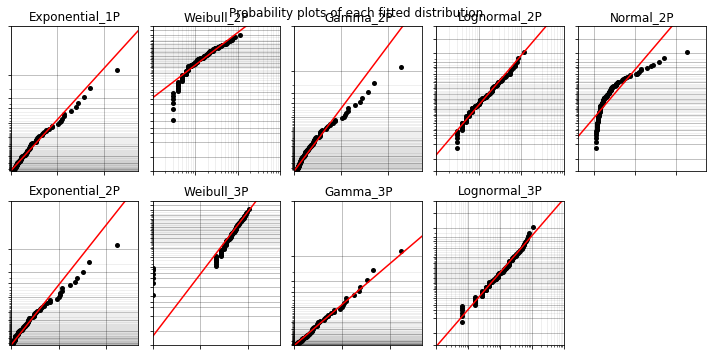

In [15]:
print("Figure 6")
results = rb.Fitters.Fit_Everything(failures=failures_time, right_censored=right_censored_time, show_histogram_plot=False, show_PP_plot=False)

From the <a href="https://reliability.readthedocs.io/en/latest/Probability%20plots.html#what-does-a-probability-plot-show-me">Reliability docs</a>:

These probability plots show how well the data is modelled by a particular distribution. The axes are scaled in such a way that the fitted distribution's CDF appears to be a straight line. The plots can be interpreted as:
- If the empirical CDF of the failure data (the black dots) lie on the straight line then the distribution is a good fit for the data.
- We usually tolerate a little bit of deviation at the tails

### Interpretation of the presented probability plots:
Clearly the Normal distribution would be likely to provide a poor description of the sampled times, as the black dots are non-linear and do not appear to follow the fitted line. The Weibull 2 and 3 parameter, Lognormal 2 and 3 parameter, Exponential 1 parameter and Gamma 3 parameter plots are all linear and appear to follow the fitted line. Both the Lognormal and Weibull however have deviation from the line at the smaller times. As there is no ability to plot the confidence interval, we cannot comment on the level of uncertainty of these distributions from these plots.

We can however use the AIC and BIC goodness of fit values to help select a distribution.

We can have a closer look at any of these plots by plotting them separately:

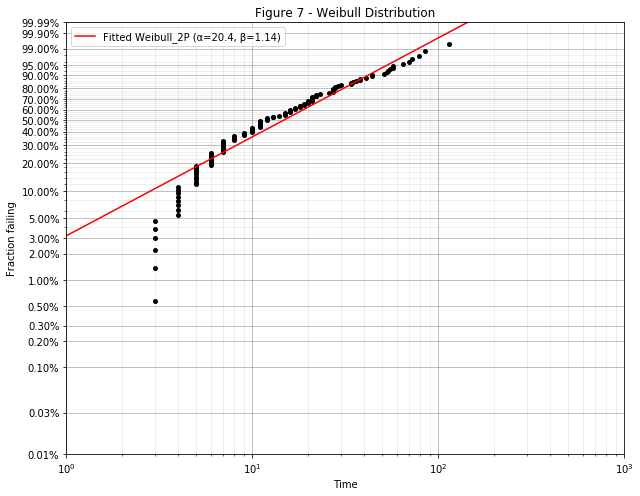

In [16]:
from reliability.Probability_plotting import Weibull_probability_plot

Weibull_probability_plot(failures=failures_time)

plt.title('Figure 7 - Weibull Distribution')
fig.set_size_inches(18.5, 10.5)

plt.show()

## 3. Fit models and estimate parameters.

First, we fit the Weibull model using the `reliability` package.

Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error   Lower CI   Upper CI
Parameter                                                      
Alpha           21.317013        1.801491  18.063075  25.157125
Beta             1.122835        0.074321   0.986222   1.278371
Log-Likelihood: -492.5142516935074


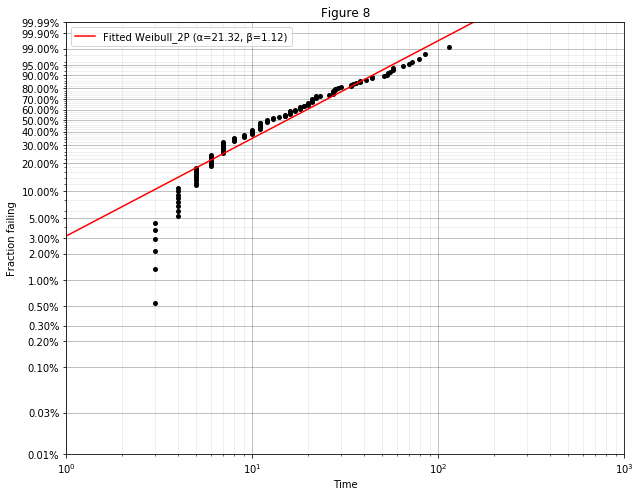

In [17]:
wbplot = rb.Fitters.Fit_Weibull_2P(failures=failures_time, right_censored=right_censored_time)
plt.title("Figure 8")
plt.show()

This gives us the same probability plot and parameter estimations as before, but now including confidence intervals.


We can see have that we have very similar values to the [original script](https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/).

And how well does this fit the data? We can see in the plot above that beyond time 7 (approx.), the line fits the data relatively well. We may, however, achieve better results with a different distribution (Lognormal or Exponential).

For further information about this function type `print(help(rb.Fitters.Fit_Weibull_2P))`

I have yet to find a function that plots the joint uncertainty of the estimated Weibull model parameters as in the [R script](https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/).

## 4. Inference

What can we learn about the reliability of this component or system from this fitted model?

Well, firstly, the value of $\hat{\beta}$= 1.12 is near 1, and the approximate 95% confidence interval for $\hat{\beta}$ of [0.99, 1.28] contains 1, which suggests that there is neither evidence for failures predominantly occurring due to ageing or wearout effects (i.e., $\hat{\beta}$ is not high), nor due to early failures, such as may occur due to manufacturing defects (i.e., $\hat{\beta}$ is not low).

First, we'll plot the failure rate, or __hazard__ function, $h(t)$.  which describes the likelihood of failure during the next time increment $(\text{i.e., } \frac{dR}{dt}=-h(t)R(t))$, using:

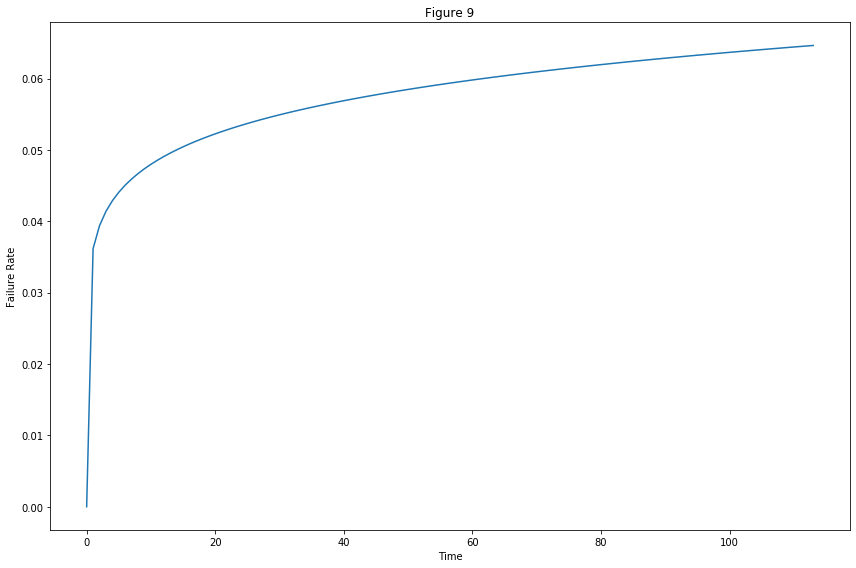

In [18]:
xvals = np.arange(0, max(failures_time))

rb.Distributions.Weibull_Distribution(alpha=wbplot.alpha, beta=wbplot.beta).HF(xvals=xvals)
plt.title("Figure 9")
plt.xlabel("Time")
plt.ylabel("Failure Rate")
plt.show()

As the $\hat{\beta}$ is only slightly above 1 and below 2, we knew that there was not a large increase in the failure rate with increasing time. A steeper increase in the hazard function occurs earlier, than later, in the life of this component or system (given model assumptions).

Next, we plot the Reliability function $R(t)$.

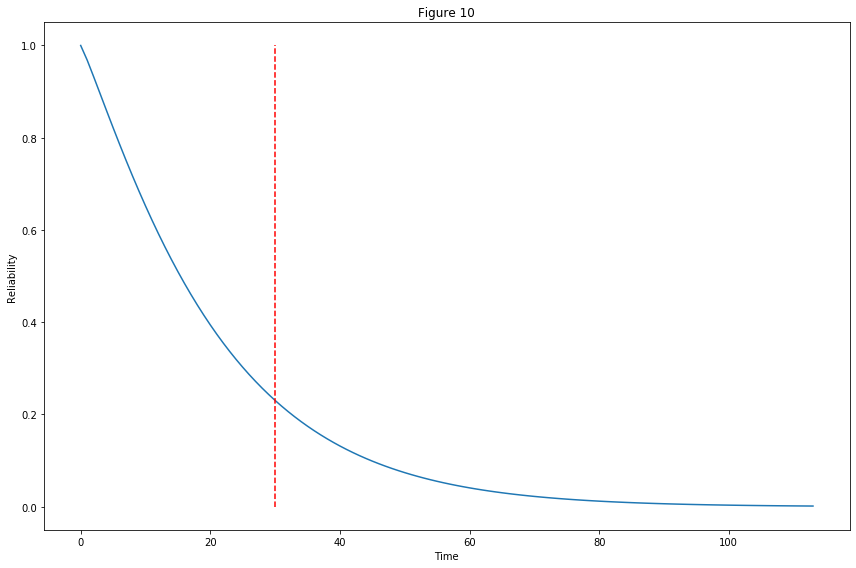

0.23046605148448837


In [19]:
xvals = np.arange(0, max(exa1['time']))

survival = rb.Distributions.Weibull_Distribution(alpha=wbplot.alpha, beta=wbplot.beta).SF(xvals=xvals)

plt.plot([30, 30], [0, 1], '--r')

plt.title("Figure 10")
plt.xlabel("Time")
plt.ylabel("Reliability")
plt.show()

print(survival[30])

This shows the trend of Reliability (the probability that the component or system is still functioning at time t) with t, also know as the Survival Function.

As survival returns an array of reliability from time 0 to the specified time, we can simply index that array at element 30 to find the value.

Next, we'll calculate the MTTF from the $\mathbb{E}[T]$ using $\hat{\beta}$ and $\hat{\eta}$. The `reliability` package doesn't have this feature yet, so we'll use the old `weibull` package.


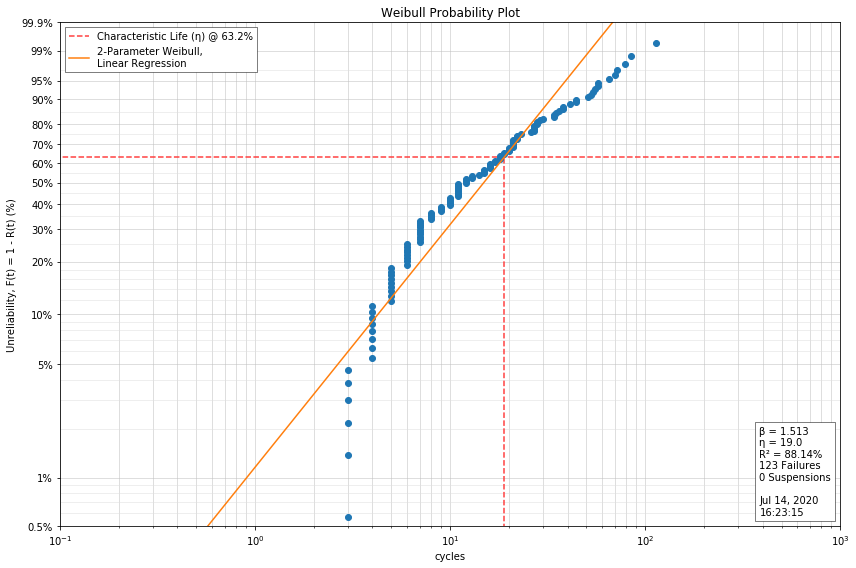

MTTF =  17.108999071844334


In [52]:
analysis = wb.Analysis(data=failures_time)

analysis.fit()

analysis.probplot()

print("MTTF = ", analysis.mttf)

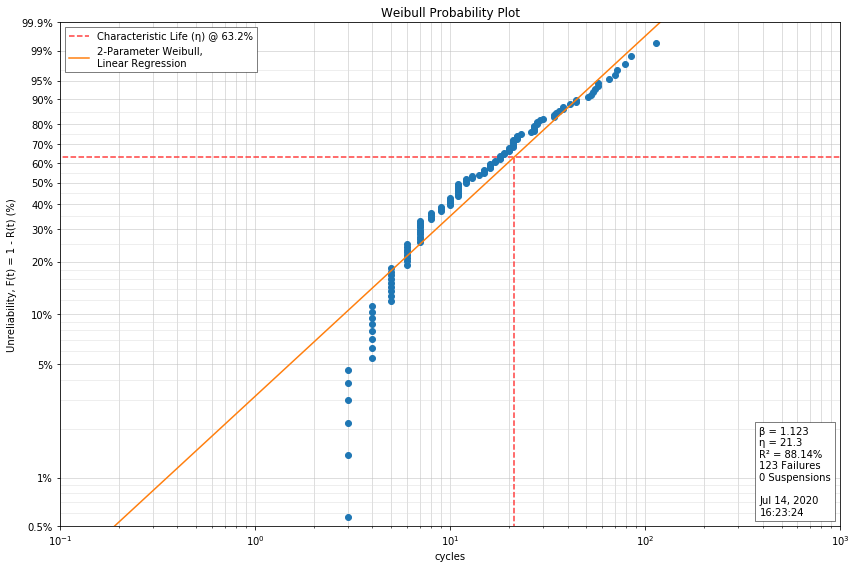

MTTF =  20.434088152386952


In [53]:
analysis = wb.Analysis(data=failures_time)

analysis.fit()

analysis.beta = wbplot.beta
analysis.eta = wbplot.alpha

analysis.probplot()

print("MTTF = ", analysis.mttf)

The `.fit()` function does not fit the data as well as the `reliability` package, so we specify the values for $\hat{\beta}$ and $\hat{\eta}$ from our analysis above.

We'll now continue on to bootstrapping to get a better idea as to how well this model performs. There is no function to do this is the `weibull` package, so we'll bootstrap doing the following:
1. Sample with replacement from the original data set
2. Generate the values for $\hat{\beta}$ and $\hat{\eta}$ using the `reliability` package
3. Generate the MTTF value using the `weibull` package
4. Calculate the statistics for the MTTF

In [30]:
##For reproducibility
np.random.seed(123)

In [55]:
size = len(failures_time)
mttf_vals = []

for i in range(0, 1000):
    new_vals = np.random.choice(failures_time, size=size)
    parameters = rb.Fitters.Fit_Weibull_2P(failures=new_vals, 
                                           show_probability_plot=False, print_results=False)
    analysis = wb.Analysis(data=new_vals)
    analysis.fit()
    analysis.beta = parameters.beta
    analysis.eta = parameters.alpha
    
    mttf_vals.append(analysis.mttf)

In [79]:
import scipy.stats as st
from math import sqrt

ci = st.t.interval(0.95,df=len(mttf_vals)-1, loc=st.describe(mttf_vals).mean, 
                   scale = sqrt(st.describe(mttf_vals).variance))

print('minimum: ', st.describe(mttf_vals).minmax[0])
print('lower 95% CI:', ci[0])
print('mean: ', st.describe(mttf_vals).mean)
print('upper 95% CI:', ci[1])
print('maximum: ', st.describe(mttf_vals).minmax[1])
print('variance: ', st.describe(mttf_vals).variance)


minimum:  14.073707614431324
lower 95% CI: 16.149001649679725
mean:  19.478539175981112
upper 95% CI: 22.8080767022825
maximum:  25.067690678938327
variance:  2.8788475567626493


Compare the MTTF to an empirical estimate for the non-censored failures:

In [81]:
print(np.mean(failures['time']))

19.349593495934958


That this value is close to the Weibull MLE for $\mathbb{E}[T]$ likely reflects that there was a relatively small proportion of censored measurements in this dataset. 


Let's plot the estimated Weibull pdf of t, with $\mathbb{E}[T]$ superimposed as a vertical solid line, with the approximate 95% confidence bounds for $\mathbb{E}[T]$ shown as dashed lines.

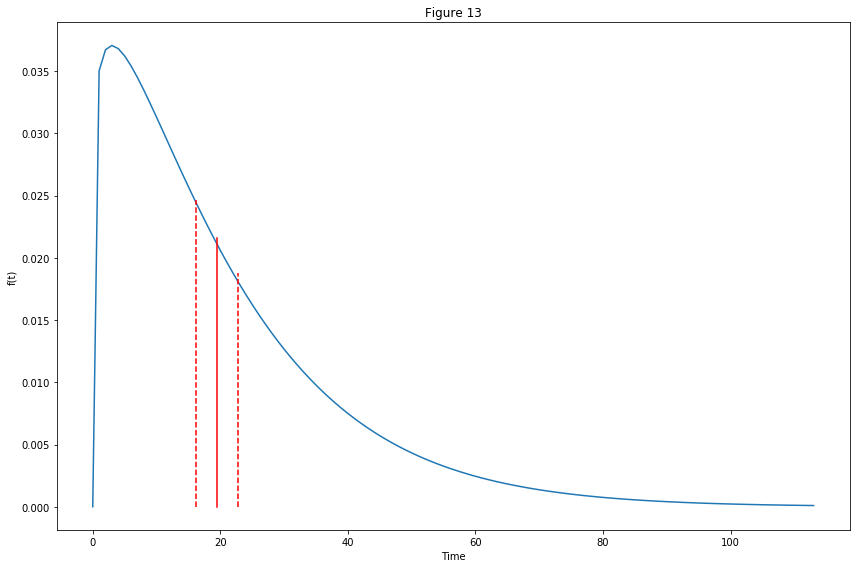

In [96]:
xvals = np.arange(0, max(failures_time))

wbplot = rb.Fitters.Fit_Weibull_2P(failures=failures_time, right_censored=right_censored_time,
                                   show_probability_plot=False, print_results=False)
pdf = rb.Distributions.Weibull_Distribution(alpha=wbplot.alpha, beta=wbplot.beta).PDF(xvals=xvals)

plt.plot([st.describe(mttf_vals).mean, st.describe(mttf_vals).mean], 
         [0, pdf[int(st.describe(mttf_vals).mean)]], '-r')
plt.plot([ci[0],ci[0]],[0, pdf[int(ci[0])] ], '--r')
plt.plot([ci[1],ci[1]],[0, pdf[int(ci[1])] ], '--r')


plt.title("Figure 13")
plt.xlabel("Time")
plt.ylabel("f(t)")
plt.show()
